On va construire et former un modèle en utilisant des enregistrements de cellules humaines et classer les cellules selon que les échantillons sont bénins ou malins

In [64]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### About data <br> 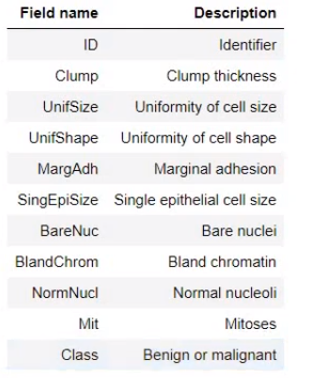# 

In [65]:
#Data
data = pd.read_csv('cancer_data.csv')
data.shape

(699, 11)

In [114]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [66]:
print("Taille de dataframe ",data.size)

Taille de dataframe  7689


In [67]:
data['Class'].value_counts()
# Class 2 = benign   ( 458 values )
# Class 4 = malignant ( 241 values )

2    458
4    241
Name: Class, dtype: int64

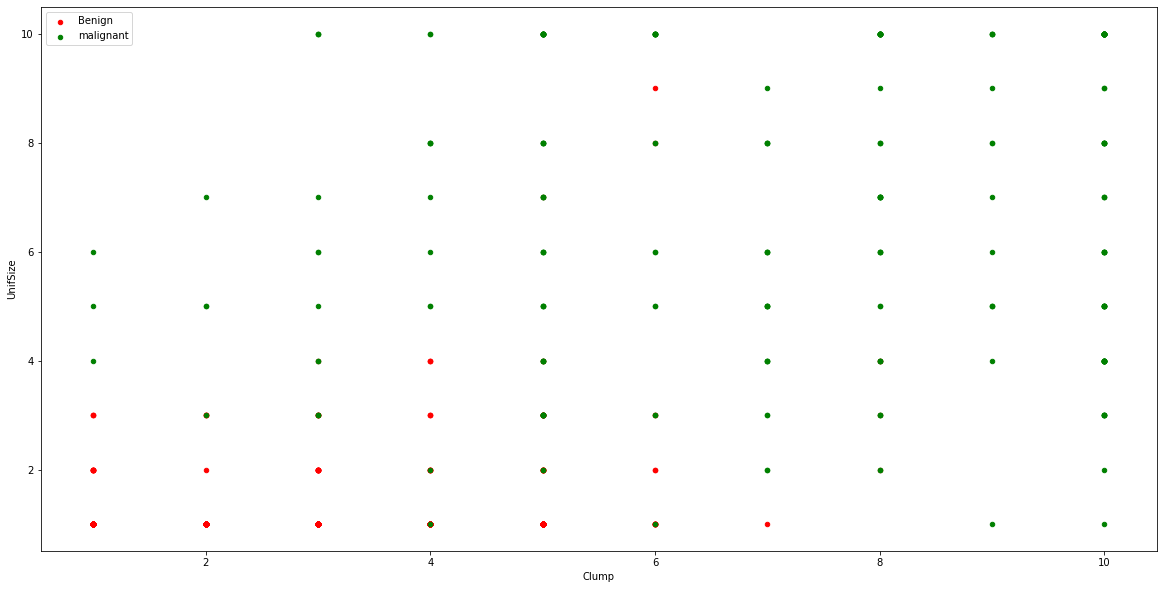

In [127]:
benign    = data[data['Class'] == 2] [0:458]
malignant = data[data['Class'] ==4 ] [0:241]
x = benign.plot  (kind='scatter', x='Clump', y='UnifSize', color = 'red', label='Benign',figsize=(20,10))
malignant.plot(kind='scatter', x='Clump', y='UnifSize', color = 'green', label='malignant',ax=x)

In [72]:
# Type des colonnes
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [85]:
import warnings
warnings.filterwarnings("ignore")

# Changer les valeurs de BareNuc d'object vers numérique
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int')

# If ‘raise’, then invalid parsing will raise an exception.

# If ‘coerce’, then invalid parsing will be set as NaN.

# If ‘ignore’, then invalid parsing will return the input.


In [86]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [88]:
#Selection des variables 
features = data[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class']]

In [122]:
# Variables 
x = np.asarray(features)

# Target
y = np.asarray(data['Class'])


In [123]:
# Diviser en train/test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=4)

In [124]:
x_train.shape #(546, 10)

y_train.shape #(546, 1)

x_test.shape #(137, 10)

y_test.shape #(137, 1)


(137,)

In [178]:
# Training the model
from sklearn import svm

svc_classifier = svm.SVC(kernel = 'sigmoid', gamma = 'auto', C = 1)
svc_classifier.fit(x_train, y_train)

# kernel = linear / polynomial / Radial basis function (RBF) / sigmoid / precomputed
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
  #if ‘auto’, uses 1 / n_features.
#c : Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [179]:
#Prediction
y_pred = svc_classifier.predict(x_test)
y_test

,0
0,2
1,4
2,2
3,4
4,2
...,...
132,2
133,2
134,2
135,2


In [180]:
y_pred

array([2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 2], dtype=int64)

In [181]:
pred    = pd.DataFrame(y_pred)
y_test  = pd.DataFrame(y_test)
Results = pd.concat([y_test, pred], axis=1,ignore_index = True)
Results = Results.rename(columns={0: "Prediction", 1: "Test"})
Results.sample(10)

,Prediction,Test
120,4,2
60,2,4
71,4,2
128,4,2
102,2,4
101,4,2
132,2,2
12,4,2
131,2,2
51,2,2


In [182]:
#Métriques
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        47

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [183]:
# Pour SVM
#Applying grid search ( Trouver les paramètres optimaux)
from sklearn.model_selection import GridSearchCV
parameters = [{"C": [1, 10, 100, 1000], "kernel": ['linear']}, 
              {"C": [1, 10, 100, 1000], "kernel": ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001]}]

#Use this list to train
grid_search = GridSearchCV(estimator = svc_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

#Use attributes of grid_search to get the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best accuracy: ",best_accuracy)
print(best_parameters)

Best accuracy:  1.0
{'C': 1, 'kernel': 'linear'}
